# 나의 활동은 비만인가...

### 0. 라이브러리 가져오기

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

### 1. 데이터셋 가져오기

In [86]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [87]:
train = df_train.copy()
test = df_test.copy()

In [88]:
train = train.drop(['rn'], axis=1)
train = train.drop(['activity'], axis=1)

test = test.drop(['rn'], axis=1)

### 2. 모델링

### PCA 분석

C:\Users\iit80\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


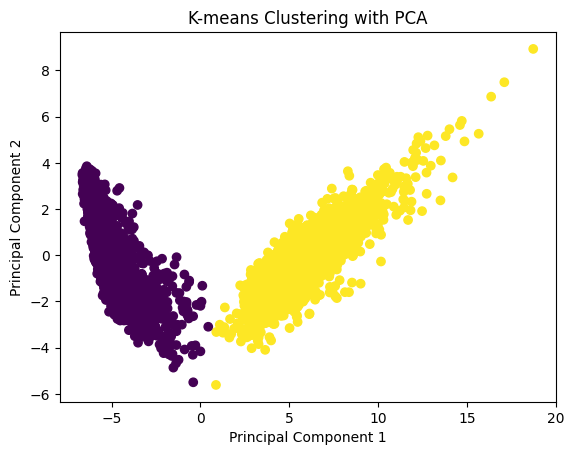

In [9]:
from sklearn.decomposition import PCA

# PCA를 사용하여 500차원을 2차원으로 축소
pca = PCA(n_components=2)
principal_components = pca.fit_transform(train)

# K-means 모델 생성
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(principal_components)

# 클러스터 예측
labels = kmeans.predict(principal_components)

# 데이터 시각화
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')
plt.title('K-means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

TSNE로 차원 축소 후 kmeans로 군집화

C:\Users\iit80\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


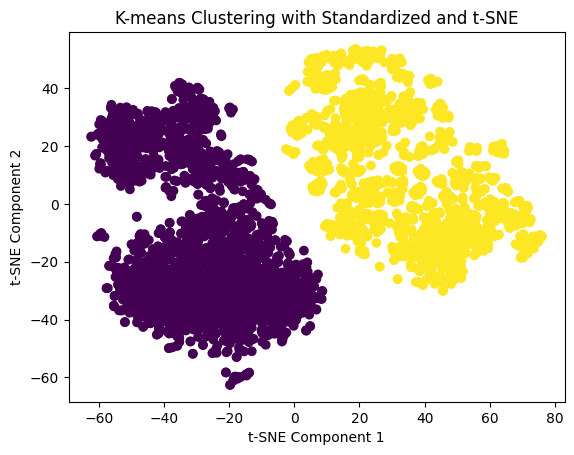

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# StandardScaler를 사용하여 데이터 정규화
scaler = StandardScaler()
tsne_result = scaler.fit_transform(train)

# t-SNE를 사용하여 데이터를 2차원으로 축소
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(tsne_result)

# K-means 모델 생성
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(tsne_result)

# 클러스터 예측
labels = kmeans.predict(tsne_result)

# 데이터 시각화
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
plt.title('K-means Clustering with Standardized and t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


두 군집이 어떤 것인지 파악하기 위해 dots을 찍어 확인

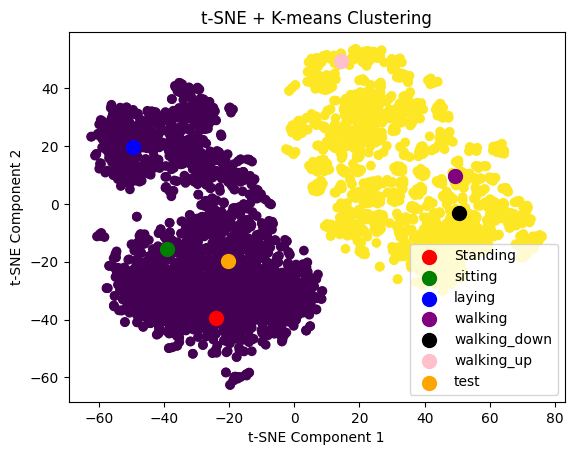

In [95]:
tsne_test = scaler.fit_transform(test)
tsne_test = tsne.fit_transform(tsne_test)


# 가정: selected_data_index는 선택한 데이터의 인덱스
selected_point = tsne_result[0]
selected_point_9 = tsne_result[586]
selected_point_17 = tsne_result[17]
selected_point_28 = tsne_result[28]
selected_point_43 = tsne_result[43]
selected_point_53 = tsne_result[53]
test_point = tsne_test[0]

# 시각화
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
plt.scatter(selected_point[0], selected_point[1], color='red', s=100, label='Standing')
plt.scatter(selected_point_9[0], selected_point_9[1], color='green', s=100, label='sitting')
plt.scatter(selected_point_17[0], selected_point_17[1], color='blue', s=100, label='laying')
plt.scatter(selected_point_28[0], selected_point_28[1], color='purple', s=100, label='walking')
plt.scatter(selected_point_43[0], selected_point_43[1], color='black', s=100, label='walking_down')
plt.scatter(selected_point_53[0], selected_point_53[1], color='pink', s=100, label='walking_up')
plt.scatter(test_point[0], test_point[1], color='orange', s=100, label='test')
plt.title('t-SNE + K-means Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


### 예측 결과

노란군집 : standing, sitting, laying

보라군집 : walking 등등

test 0번째 데이터를 찍었을 때 노랑군집에 있는것을 확인

이는 test_labels에 1값이 standing, laying, sitting에 포함된 비만가능(At Risk of Obesity)

라벨 0은 비만가능성없음(No Risk of Obesity)

In [97]:
# 가상의 테스트 데이터 생성 (실제 데이터를 사용하세요)
# K-means 모델을 사용하여 테스트 데이터의 클러스터 예측
test_labels = kmeans.predict(tsne_test)

# 테스트 데이터의 클러스터 예측값 출력
print(test_labels)

[0 0 0 ... 1 1 1]


In [99]:
import pandas as pd

# 새로운 데이터프레임 생성
df_test_result = pd.DataFrame()

# 라벨 값에 따라 데이터 할당
at_risk_of_obesity = []
no_risk_of_obesity = []

for label in test_labels:
    if label == 0:
        at_risk_of_obesity.append('O')
        no_risk_of_obesity.append('')
    elif label == 1:
        at_risk_of_obesity.append('')
        no_risk_of_obesity.append('O')

# 결과를 새로운 데이터프레임에 추가
df_test_result['At Risk of Obesity'] = at_risk_of_obesity
df_test_result['No Risk of Obesity'] = no_risk_of_obesity

# 변경된 데이터프레임 출력
df_test_result.head(30)


,At Risk of Obesity,No Risk of Obesity
0,O,
1,O,
2,O,
3,O,
4,O,
5,O,
6,O,
7,O,
8,O,
9,O,


### 평가지표

In [100]:
from sklearn.metrics import silhouette_score

# 전체 데이터에 대한 실루엣 점수 계산
silhouette_avg = silhouette_score(train, labels)
print("실루엣 점수:", silhouette_avg)


실루엣 점수: 0.47651719042238627
